In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df_teams_full = pd.read_csv('data/teams_fifa22.csv')
df_players_full = pd.read_csv('data/players_fifa22.csv')

In [3]:
df_teams_full

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,1,Arsenal,English Premier League (1),13,79,83,81,77,77500000,7,7,33,25.1,23.2
1,2,Aston Villa,English Premier League (1),13,78,79,76,77,37500000,4,3,31,24.7,23.3
2,1925,Brentford,English Premier League (1),13,73,73,74,73,18000000,1,1,33,24.7,23.4
3,1808,Brighton & Hove Albion,English Premier League (1),13,76,75,77,75,28000000,2,1,33,26.9,23.5
4,1796,Burnley,English Premier League (1),13,76,76,76,77,22000000,2,1,33,28.6,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,114611,Academia Puerto Cabello,Venezuelan Primera División (1),2019,63,64,63,62,1500000,1,1,27,27.4,24.5
730,112916,Aragua Fútbol Club,Venezuelan Primera División (1),2019,63,63,62,61,1400000,3,3,28,27.4,25.5
731,112853,Deportivo La Guaira FC,Venezuelan Primera División (1),2019,66,65,66,65,1200000,4,1,28,26.6,25.6
732,110990,Deportivo Táchira FC,Venezuelan Primera División (1),2019,63,65,63,63,1900000,6,4,27,27.7,26.1


In [4]:
df_teams_full.describe()

,ID,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,7.340000e+02,734.00000,734.000000,734.000000,734.000000,734.000000
mean,49807.358311,312.163488,68.878747,69.350136,68.908719,68.181199,9.032819e+06,5.50545,2.728883,27.209809,26.755177,25.284741
std,54354.884897,596.232032,5.286371,5.715518,5.345228,5.287492,1.779685e+07,2.86425,2.215242,2.912009,1.703706,1.474471
min,1.000000,1.000000,55.000000,55.000000,55.000000,55.000000,0.000000e+00,1.00000,1.000000,19.000000,20.600000,20.100000
25%,581.500000,20.000000,65.000000,65.000000,65.000000,64.000000,1.700000e+06,3.00000,1.000000,26.000000,25.600000,24.300000
50%,1928.500000,61.000000,68.000000,69.000000,68.000000,68.000000,3.500000e+06,5.00000,2.000000,28.000000,26.800000,25.300000
75%,111127.500000,336.000000,72.000000,73.000000,72.000000,71.000000,8.500000e+06,8.00000,4.000000,29.000000,27.900000,26.300000
max,115820.000000,2149.000000,86.000000,92.000000,86.000000,86.000000,1.760000e+08,10.00000,10.000000,33.000000,32.100000,30.200000


In [5]:
df_players_full

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,262759,S. Black,Stephen Black,19,180,75,https://cdn.sofifa.com/players/262/759/22_60.png,Republic of Ireland,48,62,...,36,35,36,44,43,44,47,50,47,15
19256,250978,Ma Zhen,Zhen Ma,23,196,85,https://cdn.sofifa.com/players/250/978/22_60.png,China PR,48,52,...,26,23,26,26,23,26,26,26,26,49
19257,261985,Yang Haoyu,Haoyu Yang,20,183,77,https://cdn.sofifa.com/players/261/985/22_60.png,China PR,48,55,...,36,35,36,46,45,46,48,50,48,15
19258,261977,He Siwei,Siwei He,20,174,69,https://cdn.sofifa.com/players/261/977/22_60.png,China PR,48,58,...,38,37,38,46,45,46,49,50,49,17


In [6]:
df_players_full.describe()

,ID,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
count,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,1.926000e+04,...,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000
mean,231682.741952,25.184683,181.305036,74.950779,65.815628,71.100104,5.284476,1598.525909,357.062461,2.857652e+06,...,58.364434,57.227207,58.364434,56.197040,55.771340,56.197040,55.539823,54.379595,55.539823,23.242939
std,26960.272515,4.737340,6.866151,7.066864,6.817297,6.092103,5.472201,271.575855,39.910613,7.604532e+06,...,13.989045,13.212152,13.989045,13.818416,13.856922,13.818416,14.063862,14.678658,14.063862,15.053823
min,41.000000,16.000000,155.000000,49.000000,48.000000,49.000000,0.000000,767.000000,227.000000,0.000000e+00,...,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000,16.000000,18.000000,16.000000,10.000000
25%,214903.500000,21.000000,176.000000,70.000000,62.000000,67.000000,0.000000,1462.000000,329.000000,4.750000e+05,...,54.000000,52.000000,54.000000,51.000000,48.000000,51.000000,49.000000,44.000000,49.000000,17.000000
50%,236687.500000,25.000000,181.000000,75.000000,66.000000,71.000000,4.000000,1633.000000,358.000000,9.750000e+05,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,253607.500000,29.000000,186.000000,80.000000,70.000000,75.000000,9.000000,1782.000000,384.000000,2.000000e+06,...,67.000000,66.000000,67.000000,65.000000,66.000000,65.000000,65.000000,66.000000,65.000000,20.000000
max,264705.000000,54.000000,206.000000,110.000000,93.000000,95.000000,26.000000,2341.000000,501.000000,1.940000e+08,...,93.000000,91.000000,93.000000,88.000000,90.000000,88.000000,88.000000,89.000000,88.000000,92.000000


I decided to change the display of numbers from scientific notation to regular format so that they are easier for us to read.

In [7]:
pd.options.display.float_format = '{:,.0f}'.format

I also noticed that in the team table, the league names contain numbers in parentheses. I believe these indicate the division in which the teams play, and I decided it would be better to extract this information into a separate column.

In [8]:
df_teams_full['Division'] = df_teams_full['League'].str.extract(r'\((\d+)\)')
df_teams_full['Division'] = pd.to_numeric(df_teams_full['Division'])
df_teams_full['LeagueClean'] = df_teams_full['League'].str.replace(r'\s*\(\d+\)', '', regex=True)
df_teams_full.head()

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge,Division,LeagueClean
0,1,Arsenal,English Premier League (1),13,79,83,81,77,77500000,7,7,33,25,23,1,English Premier League
1,2,Aston Villa,English Premier League (1),13,78,79,76,77,37500000,4,3,31,25,23,1,English Premier League
2,1925,Brentford,English Premier League (1),13,73,73,74,73,18000000,1,1,33,25,23,1,English Premier League
3,1808,Brighton & Hove Albion,English Premier League (1),13,76,75,77,75,28000000,2,1,33,27,24,1,English Premier League
4,1796,Burnley,English Premier League (1),13,76,76,76,77,22000000,2,1,33,29,27,1,English Premier League


## Null Columns
You can see there are several null columns in the player dataset:

In [9]:
null_summary = df_players_full.isna().sum()
null_cols_with_count = null_summary[null_summary > 0]
null_cols_with_count

ClubPosition           76
ContractUntil          76
ClubNumber             76
NationalPosition    18503
NationalNumber      18503
dtype: int64

Because the columns `ClubPosition`, `ContractUntil`, and `ClubNumber` have exactly the same number of NULL values, I can assume that these are the rows of players whose contracts with their clubs have expired and who have not yet signed contracts with other clubs.

Regarding `NationalPosition` and `NationalNumber`, I think these are players who were not called up to the national team this year (or have never been called up / are not part of the national team setup).

## Filtering table

Since the table has a lot of columns and not all of them are important, I decided to filter it and keep only the data that I consider relevant:

1. Player Identity & Demographics
    - Name: The short name of the player (e.g., "L. Messi").
    - Age: Player's age in years.
    - Height: Player's height (in cm).
    - Weight: Player's weight (in kg).
    - Nationality: The country the player represents.
    - PreferredFoot: Indicates if the player is Left or Right-footed.

2. General Ratings
    - Overall: The main rating of the player's current ability (0-99).
    - Potential: The maximum rating the player can achieve in the future.
    - Growth: The difference between Potential and Overall (Potential - Overall).

3. Club & Contract Info
    - Club: The name of the team the player currently plays for.
    - ValueEUR: The market value of the player in Euros.
    - WageEUR: The weekly salary of the player in Euros.
    - ReleaseClause: The amount a club must pay to bypass negotiations (Buyout clause).
    - BestPosition: The theoretical best position for the player based on their stats.

4. Detailed Skills & Attributes
    - AttackingWorkRate: Effort level in attack (Low/Medium/High).
    - DefensiveWorkRate: Effort level in defense (Low/Medium/High).
    - PaceTotal: Summary of speed.
    - ShootingTotal: Summary of shooting ability.
    - PassingTotal: Summary of passing ability.
    - DribblingTotal: Summary of dribbling ability.
    - DefendingTotal: Summary of defensive ability.
    - PhysicalityTotal: Summary of physical strength and stamina.


In [10]:
selected_features = [
    'Name', 'Age', 'Nationality', 'Height', 'Weight', 'Club',
    'Overall', 'Potential', 'Growth',
    'ValueEUR', 'WageEUR', 'ReleaseClause',
    'BestPosition', 'PreferredFoot', 'AttackingWorkRate','DefensiveWorkRate',
    'PaceTotal', 'ShootingTotal', 'PassingTotal',
    'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'
]

df_players = df_players_full[selected_features].copy()

In [11]:
df_players.shape

(19260, 22)

In [12]:
df_players.describe()

,Age,Height,Weight,Overall,Potential,Growth,ValueEUR,WageEUR,ReleaseClause,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
count,"19,260","19,260","19,260","19,260","19,260","19,260","19,260","19,260","19,260","19,260","19,260","19,260","19,260","19,260","19,260"
mean,25,181,75,66,71,5,"2,857,652","8,974","5,066,563",68,54,58,63,50,65
std,5,7,7,7,6,5,"7,604,532","19,415","14,541,898",11,14,10,10,16,10
min,16,155,49,48,49,0,0,0,0,28,18,25,26,14,29
25%,21,176,70,62,67,0,"475,000","1,000","694,000",62,44,52,58,35,58
50%,25,181,75,66,71,4,"975,000","3,000","1,500,000",68,56,58,64,54,66
75%,29,186,80,70,75,9,"2,000,000","8,000","3,400,000",75,64,65,69,63,72
max,54,206,110,93,95,26,"194,000,000","350,000","373,500,000",97,94,93,95,91,92


In [13]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Nationality        19260 non-null  object
 3   Height             19260 non-null  int64 
 4   Weight             19260 non-null  int64 
 5   Club               19260 non-null  object
 6   Overall            19260 non-null  int64 
 7   Potential          19260 non-null  int64 
 8   Growth             19260 non-null  int64 
 9   ValueEUR           19260 non-null  int64 
 10  WageEUR            19260 non-null  int64 
 11  ReleaseClause      19260 non-null  int64 
 12  BestPosition       19260 non-null  object
 13  PreferredFoot      19260 non-null  object
 14  AttackingWorkRate  19260 non-null  object
 15  DefensiveWorkRate  19260 non-null  object
 16  PaceTotal          19260 non-null  int64

## Distributions
I decided to examine how all the data is distributed to identify interesting patterns

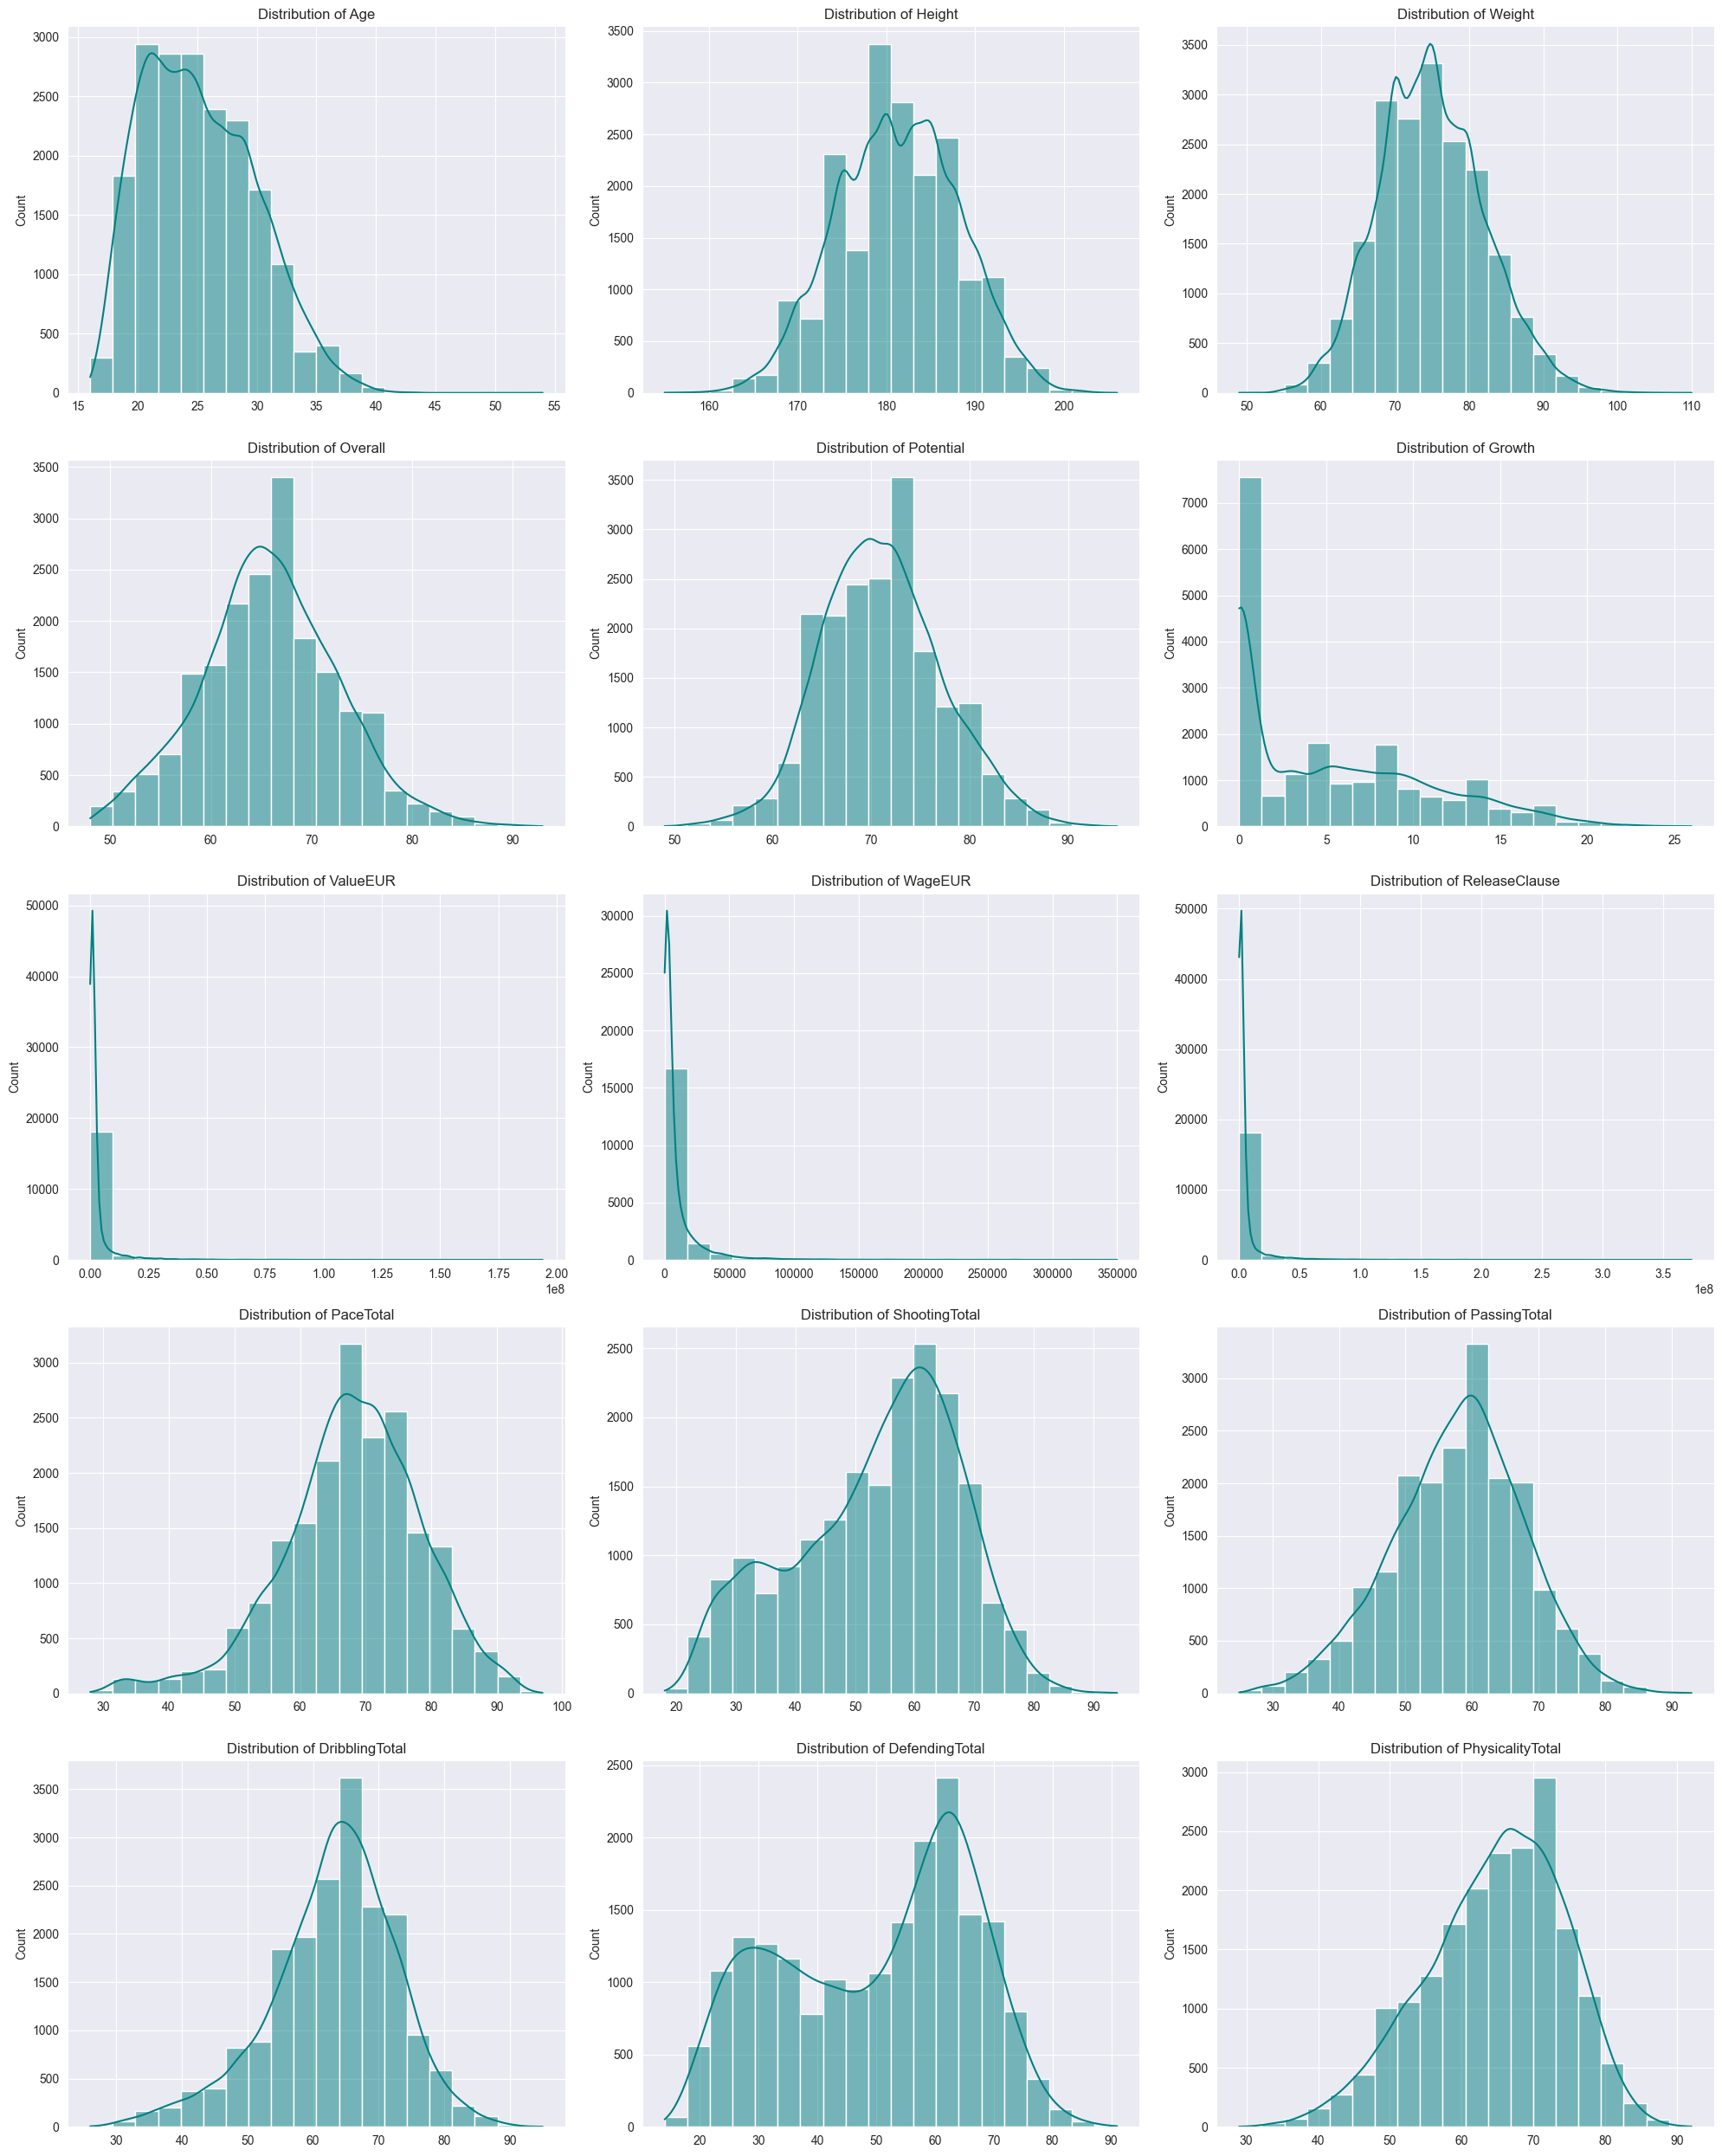

In [14]:
numeric_columns = [
    'Age', 'Height', 'Weight',
    'Overall', 'Potential', 'Growth',
    'ValueEUR', 'WageEUR', 'ReleaseClause',
    'PaceTotal', 'ShootingTotal', 'PassingTotal',
    'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal'
]

cols_per_row = 3
rows = math.ceil(len(numeric_columns) / cols_per_row)

plt.figure(figsize=(20, 5 * rows))

for i, column in enumerate(numeric_columns):
    plt.subplot(rows, cols_per_row, i + 1)

    sns.histplot(data=df_players, x=column, kde=True, color='teal', bins=20)

    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### ValueEUR, WageEUR, and ReleaseClause

The first thing I noticed is that the ValueEUR, WageEUR, and ReleaseClause columns are heavily right-skewed. \
This is because the majority of players have relatively low values, but since we also have superstars with extremely high salaries and market values, the histogram is right-skewed. \
I decided to examine the players with the lowest wages to understand exactly who falls into this group.

In [15]:
low_wage_players = df_players[df_players['WageEUR'] <= 30000]

print(f"The percentage of the total database: {len(low_wage_players) / len(df_players) * 100:.1f}%")

columns_to_show = ['Name', 'Age', 'Club', 'Overall', 'Potential', 'WageEUR']
low_wage_players[columns_to_show].describe()

The percentage of the total database: 93.3%


,Age,Overall,Potential,WageEUR
count,"17,972","17,972","17,972","17,972"
mean,25,65,70,"5,077"
std,5,6,6,"6,217"
min,16,48,49,0
25%,21,61,67,"1,000"
50%,24,65,70,"2,000"
75%,29,69,74,"6,000"
max,54,84,90,"30,000"


#### High-rated players with low wages

In the table, I noticed that there are players with quite high ratings, so I decided to figure out exactly who these players are.

In [16]:
top_low_wage = low_wage_players.sort_values(by='Overall', ascending=False).head(10)
top_low_wage[columns_to_show]

,Name,Age,Club,Overall,Potential,WageEUR
115,Jesús Navas,35,Sevilla FC,84,84,30000
154,C. Vela,32,Los Angeles FC,83,83,17000
159,T. Alderweireld,32,Free agent,83,83,0
140,S. Coates,30,Sporting CP,83,83,21000
254,Y. Bounou,30,Sevilla FC,82,82,29000
277,J. Corona,28,FC Porto,82,82,22000
275,M. Götze,29,PSV,82,82,29000
274,D. Blind,31,Ajax,82,82,23000
258,N. Tagliafico,28,Ajax,82,82,24000
255,Grimaldo,25,SL Benfica,82,85,18000


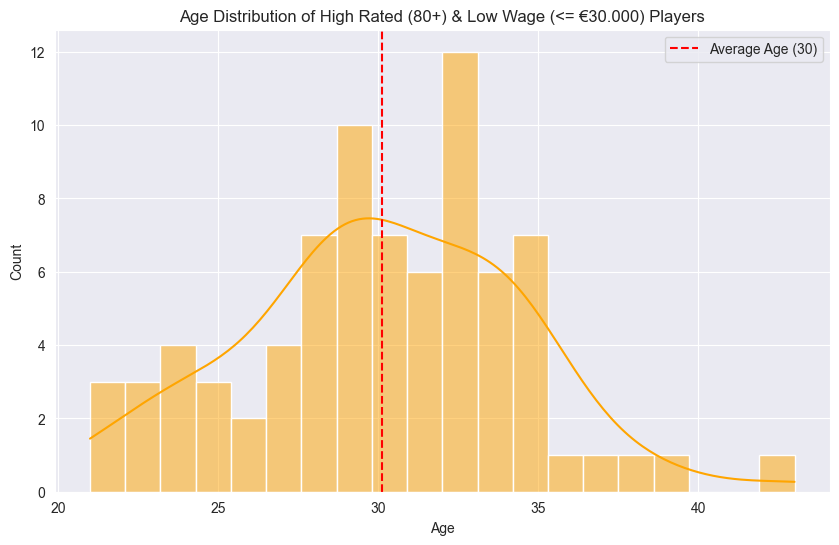

In [17]:
veterans_players = low_wage_players[low_wage_players['Overall'] >= 80]

avg_age_veterans = veterans_players['Age'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(data=veterans_players, x='Age', kde=True, color='orange', bins=20)

plt.axvline(avg_age_veterans, color='red', linestyle='--', label=f'Average Age ({avg_age_veterans:.0f})')

plt.title(f'Age Distribution of High Rated (80+) & Low Wage (<= €30.000) Players')
plt.legend()
plt.show()

We can see that these are players with an average age of 30 years, meaning they are at the twilight of their careers, and this is also the reason for their relatively low salaries.

#### Players with low wages but with high potential

Also, in the low_wage_players group, we can see players with high potential. These are young players who are still on rookie/first-professional contracts.

In [18]:
hidden_gems = low_wage_players[low_wage_players['Potential'] > 85]
hidden_gems[['Name', 'Age', 'Club', 'Overall', 'Potential', 'WageEUR']].sort_values(by='Age').head(10)

,Name,Age,Club,Overall,Potential,WageEUR
13262,D. Scarlett,17,Tottenham Hotspur,63,86,3000
3042,R. Cherki,17,Olympique Lyonnais,73,88,9000
9173,C. Clark,18,New York Red Bulls,66,86,6000
8385,F. Carvalho,18,Fulham,67,86,6000
7391,B. Šeško,18,FC Red Bull Salzburg,68,86,5000
4904,Francisco Conceição,18,FC Porto,70,86,3000
2497,H. Elliott,18,Liverpool,73,87,29000
9571,Kayky,18,Manchester City,66,87,12000
1394,A. Hložek,18,AC Sparta Praha,76,87,500
1053,G. Reyna,18,Borussia Dortmund,77,87,18000


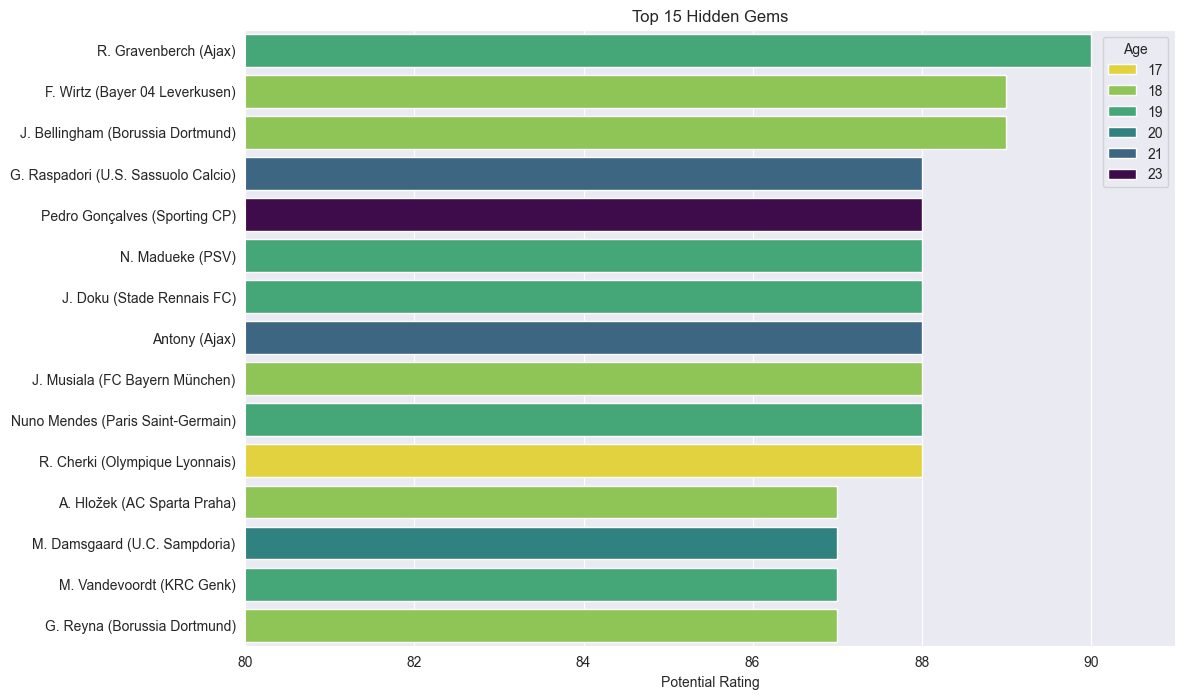

In [19]:
top_gems = hidden_gems.sort_values(by='Potential', ascending=False).head(15).copy()

top_gems['Label'] = top_gems['Name'] + ' (' + top_gems['Club'] + ')'

plt.figure(figsize=(12, 8))

sns.barplot(
    data=top_gems,
    y='Label',
    x='Potential',
    hue='Age',
    palette='viridis_r',
    dodge=False
)

plt.title('Top 15 Hidden Gems')
plt.xlabel('Potential Rating')
plt.ylabel('')

plt.xlim(80, top_gems['Potential'].max() + 1)

plt.show()

Since these are 2022 data, we can now say that some players have fulfilled their potential or are close to it, specifically:
- Nuno Mendes current rating 86
- J. Musiala current rating 88
- Jude Belligham current rating 90
- F. Wirtz current rating 89

## Dependence of Player Performance on Age

I decided to create the most obvious chart: how a player's metrics change with age.

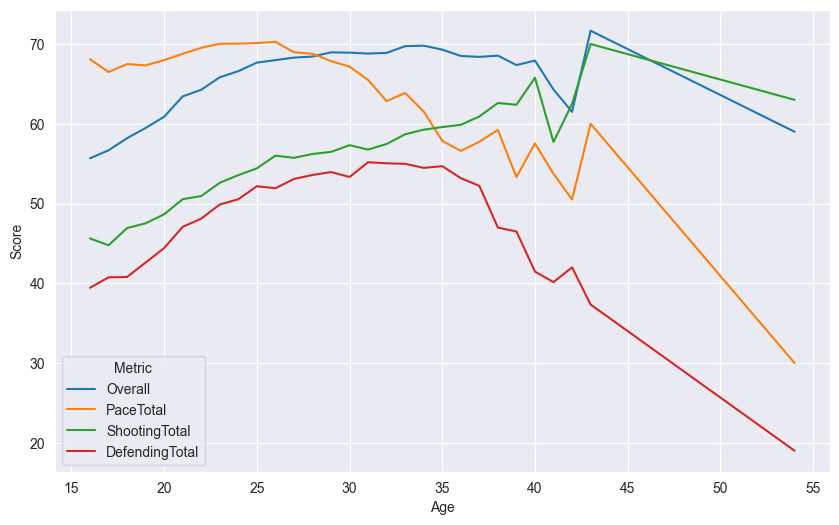

In [26]:
df_grouped = df_players.groupby('Age').agg({
    'Overall': 'mean',
    'PaceTotal': 'mean',
    'ShootingTotal': 'mean',
    'DefendingTotal': 'mean'
}).reset_index()

df_melted = df_grouped.melt(id_vars='Age',
                            value_vars=['Overall', 'PaceTotal', 'ShootingTotal', 'DefendingTotal'],
                            var_name='Metric',
                            value_name='Score')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Age', y='Score', hue='Metric')

plt.show()

Here we can see that almost all metrics start to decline around the age of 35 (speed drops earlier, but for the sake of generalization I took 35). The only exception is ShootingTotal.

I believe this is because as players get older and lose their pace, they have to adapt by improving their long-range shooting to remain effective – since they can no longer easily beat defenders with speed, they compensate by striking the ball more accurately and powerfully from distance.

### Survivorship Bias

I was surprised that most metrics only start declining around age 35 (except for pace). After thinking about it, I realized this is because by age 35+, the majority of average players have already retired and are no longer in the dataset. Only the good remain, and their high ratings pull the average upward.

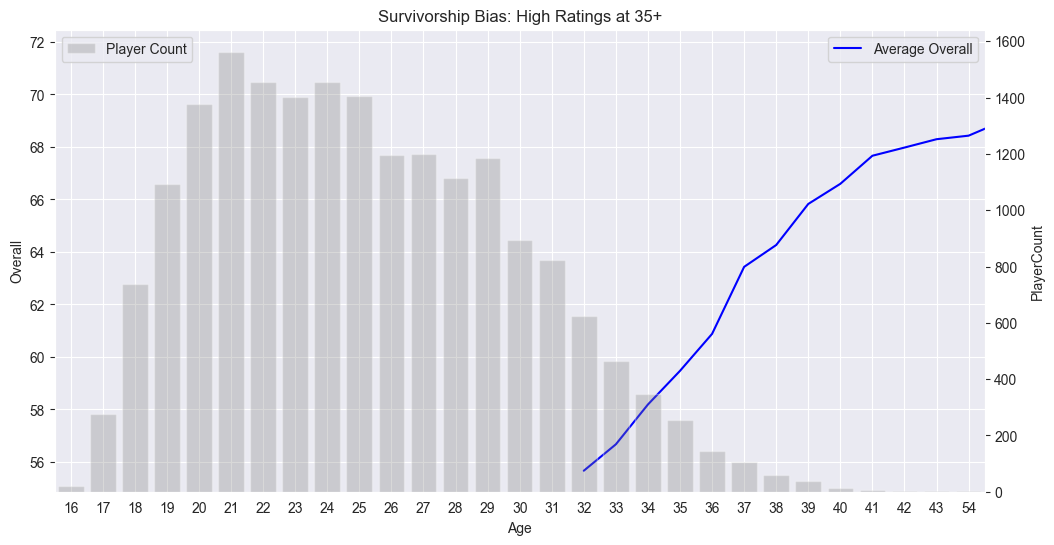

In [43]:
df_stats = df_players.groupby('Age').agg({
    'Overall': 'mean',
    'Name': 'count'
}).reset_index()

df_stats = df_stats.rename(columns={'Name': 'PlayerCount'})

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_stats, x='Age', y='Overall', ax=ax1, color='blue', label='Average Overall')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()

sns.barplot(data=df_stats, x='Age', y='PlayerCount', ax=ax2, alpha=0.3, color='gray', label='Player Count')
ax2.legend(loc='upper left')
ax2.grid(False)

plt.title('Survivorship Bias: High Ratings at 35+')
plt.show()

On the graph, we can see that the number of players starts to decline, while the overall rating, on the contrary, begins to rise.

## Merged dataset

I decided to merge the players and teams datasets to see if anything interesting emerges.

In [37]:
df_teams = df_teams_full[['Name', 'LeagueClean', 'Division','DomesticPrestige']]

fifa_merged = df_players.merge(df_teams, left_on='Club', right_on='Name', how='left')

fifa_merged = fifa_merged.rename(columns={'Name_x': 'Name'})

if 'Name_y' in fifa_merged.columns:
    fifa_merged = fifa_merged.drop(columns=['Name_y'])

fifa_merged[['Name', 'Club', 'LeagueClean', 'Division', 'WageEUR']].head()

,Name,Club,LeagueClean,Division,WageEUR
0,L. Messi,Paris Saint-Germain,French Ligue 1,1,320000
1,R. Lewandowski,FC Bayern München,German 1. Bundesliga,1,270000
2,Cristiano Ronaldo,Manchester United,English Premier League,1,270000
3,K. Mbappé,Paris Saint-Germain,French Ligue 1,1,230000
4,J. Oblak,Atlético de Madrid,Spain Primera Division,1,130000


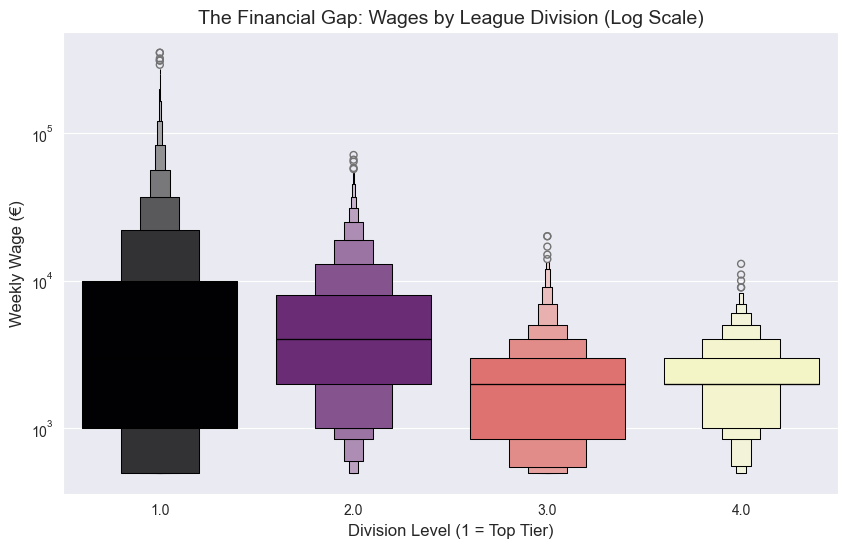

In [49]:
plt.figure(figsize=(10, 6))

filtered_divisions = fifa_merged[fifa_merged['Division'].isin([1, 2, 3, 4])]

sns.boxenplot(
    data=filtered_divisions,
    x='Division',
    y='WageEUR',
    hue='Division',
    palette='magma',
    legend=False
)

plt.yscale('log')
plt.title('The Financial Gap: Wages by League Division (Log Scale)', fontsize=14)
plt.ylabel('Weekly Wage (€)', fontsize=12)
plt.xlabel('Division Level (1 = Top Tier)', fontsize=12)

plt.show()

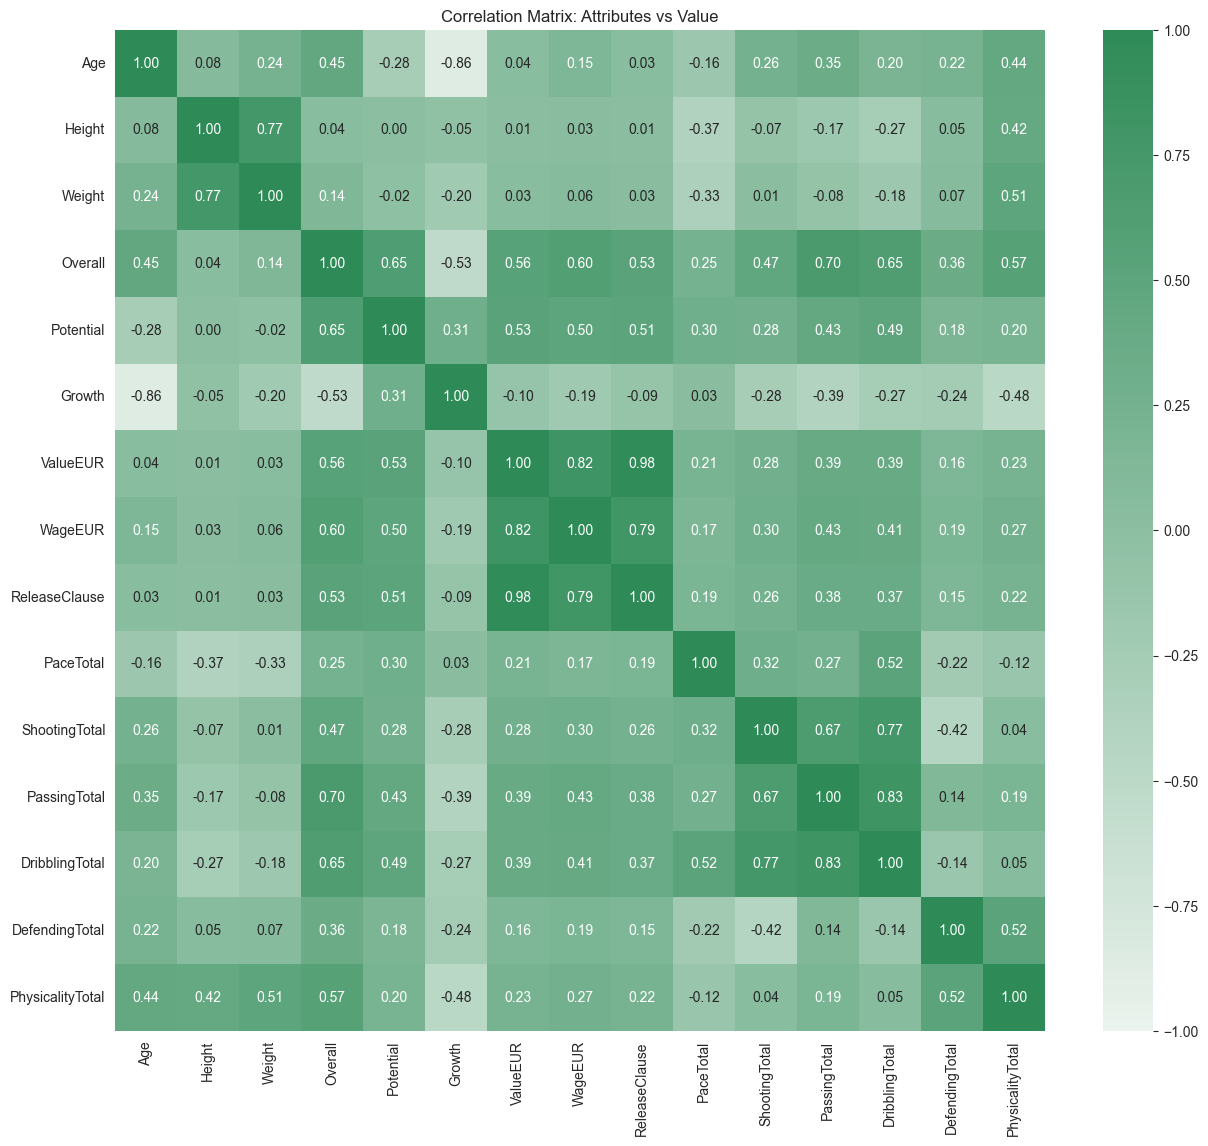

In [39]:
corr_columns = ['Overall', 'Potential', 'ValueEUR', 'WageEUR', 'Age',
                'PaceTotal', 'ShootingTotal', 'PassingTotal',
                'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']

plt.figure(figsize=(15, 13  ))
heatmap = sns.heatmap(df_players[numeric_columns].corr(), annot=True, fmt='.2f', cmap=sns.light_palette("seagreen", as_cmap=True), vmin=-1, vmax=1)
plt.title('Correlation Matrix: Attributes vs Value')
plt.show()

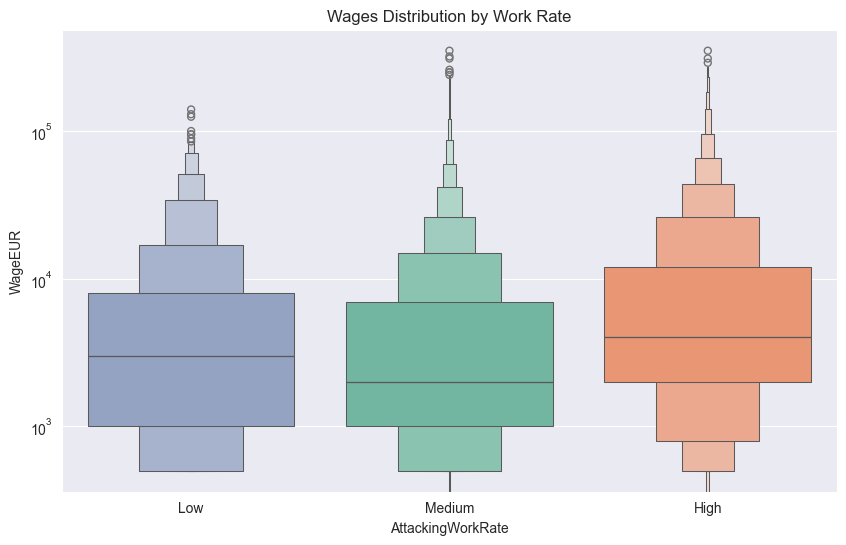

In [40]:
plt.figure(figsize=(10, 6))

sns.boxenplot(
    data=df_players,
    x='AttackingWorkRate',
    y='WageEUR',
    hue='AttackingWorkRate',
    legend=False,
    order=['Low', 'Medium', 'High'],
    palette='Set2'
)

plt.yscale('log')
plt.title('Wages Distribution by Work Rate')
plt.show()

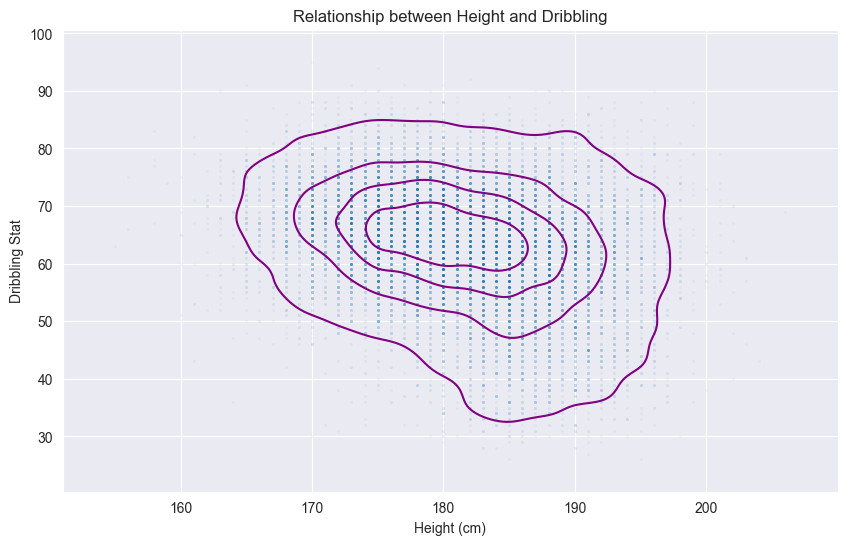

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_players, x='Height', y='DribblingTotal', alpha=0.05, s=5)
sns.kdeplot(data=df_players, x='Height', y='DribblingTotal', color='purple', levels=5)
plt.title('Relationship between Height and Dribbling')
plt.xlabel('Height (cm)')
plt.ylabel('Dribbling Stat')
plt.show()